In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install missingno
import missingno as msno


In [50]:
#df = pd.read_csv("../movies_dataset.csv")
#df_creditos = pd.read_csv("../credits.csv")

df_movies = pd.read_parquet('data/df_movies_parquet.parquet',engine='pyarrow')
df_crew = pd.read_parquet('data/df_crew_parquet.parquet',engine='pyarrow')
df_cast = pd.read_parquet('data/df_cast_parquet.parquet',engine='pyarrow')


In [54]:
df_movies.dropna(axis=0,inplace=True)

In [56]:
df_movies['genres'].sample(2)

16871                      [[18, "Drama"], [35, "Comedy"]]
1740     [[12, "Adventure"], [14, "Fantasy"], [28, "Act...
Name: genres, dtype: object

## EDA: Analisis Exploratorio de datos

Respecto al analisis sobre el dataframe movies, son centraremos de manera mas profunda en las columnas: genres, budget, popularity, revenue, runtime, title, vote_count y return. Ademas de realizar un analisis temporal

<AxesSubplot: >

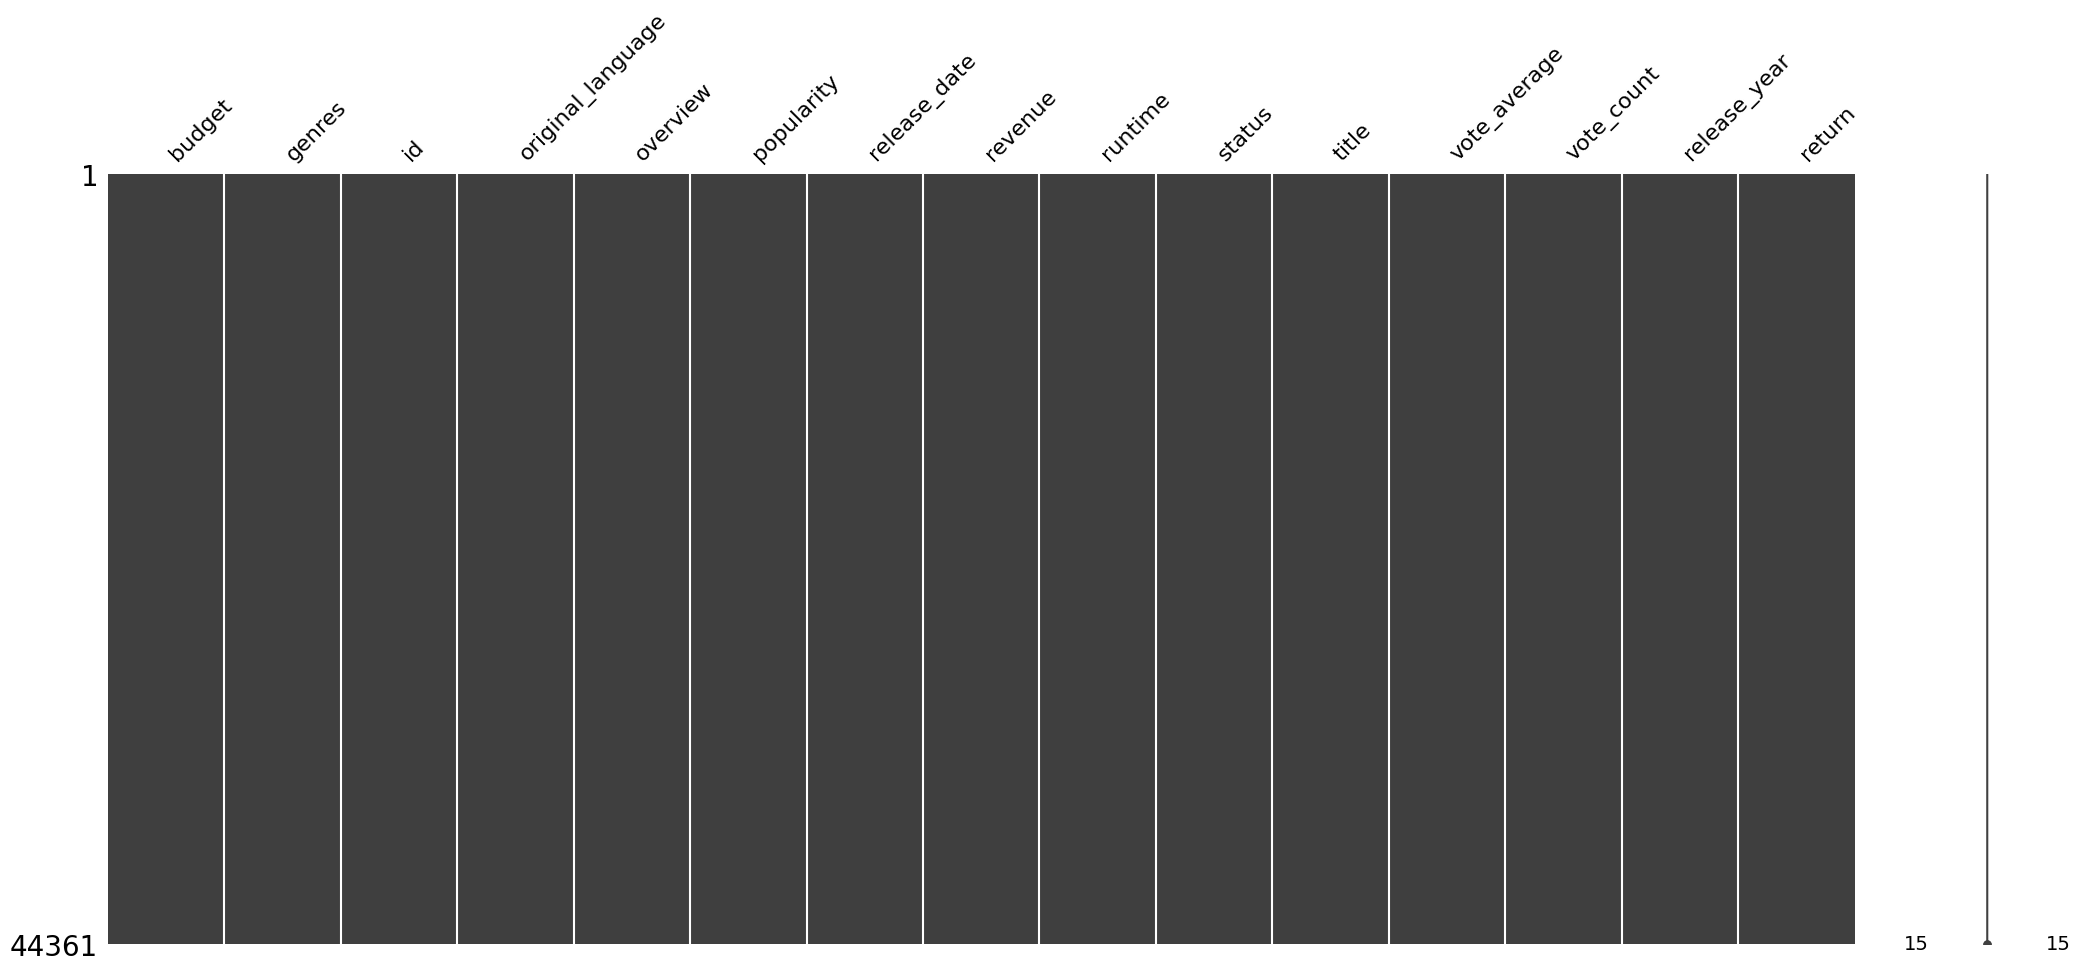

In [57]:
msno.matrix(df_movies)

#### 1.1 Pairplot y heatmap: correlacion entre variables

In [28]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.drop(columns=['id'],inplace=True)


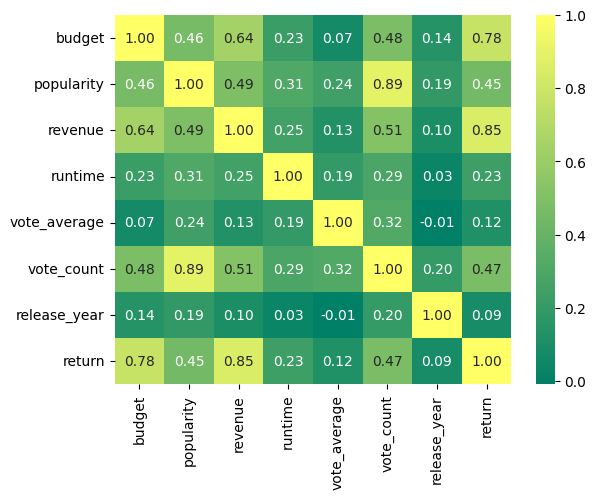

In [29]:
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,fmt='.2f',cmap='summer')
plt.show()

Aclarar que correlacion no implica causalidad y considerar tambien que algunas variables no numericas podrian afectar tambien a la aplicacion de un modelo.

Para una futura aplicacion de un modelo que intente predecir los valores del presupuesto de la pelicula, en caso de desear saber si vale la pena o no hacer la pelicula, podrian considerarse usar columnas como revenue y popularity.

#### 1.2 Distribucion de los datos: Boxplots

In [31]:
def grafico_de_caja(df,column, title=''):
    # Funcion para graficar todos los graficos de caja de cada una de las variables del dataframe.
    n_rows = len(column)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(15, 20))
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.5)
    for i in range(n_rows):
        ax = axes[i]
        sns.boxplot(data=df[column[i]], ax=ax, orient='h')
        ax.set_title(f'{column[i]} {title}', loc="right")
    return plt.show()

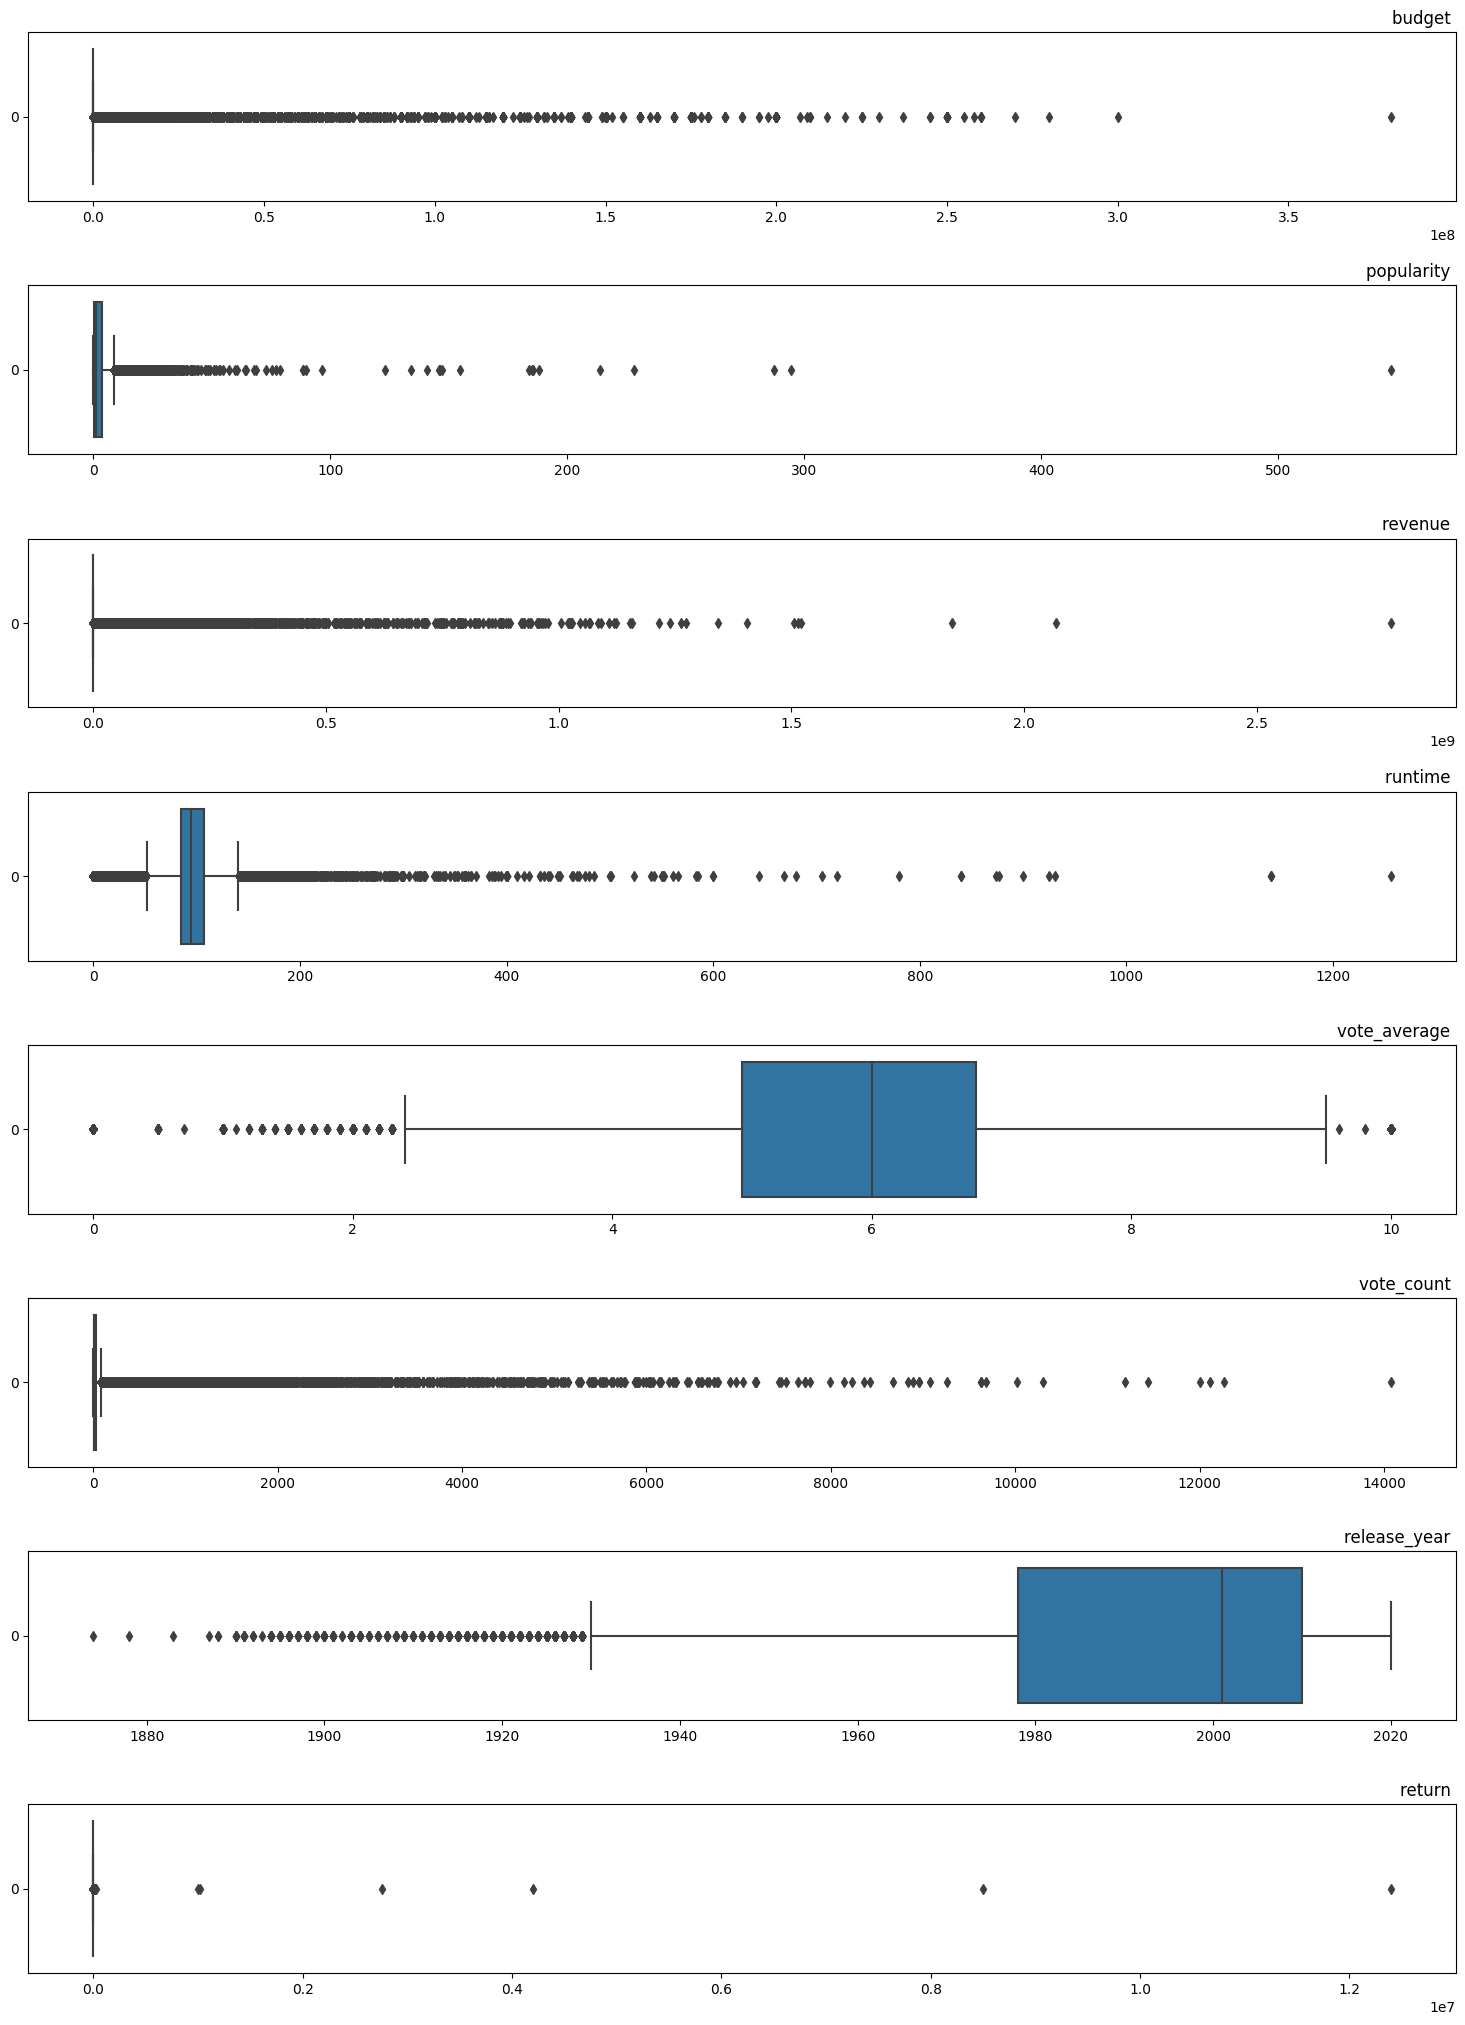

In [32]:
df = df.dropna(subset=['genres'],axis=0)
box = grafico_de_caja(df_numeric,column=df_numeric.columns)

Algunas columnas presentan valores atipicos en los datos por lo que deberian analizarse particularmente para observar si son valores correctos o no lo son.

Valores por ejemplo de "runtime" que son outliers, podrian llegar a ser documentales por lo que su valor seria correcto.

In [33]:
df_numeric['runtime'].max()

1256.0

In [39]:
def graficar_histogramas(df, columnas):
  # Funcion para graficar todos los histogramas de cada una de las variables con los valores de asimetria y curtosis
  fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 4*len(columnas)))
  for i, columna in enumerate(columnas):
    # Graficar histograma
    sns.histplot(data=df, x=columna, ax=axes[i],bins=50)
    plt.xlim(auto=True)
    plt.ylim(auto=True)
  plt.tight_layout()
  return fig

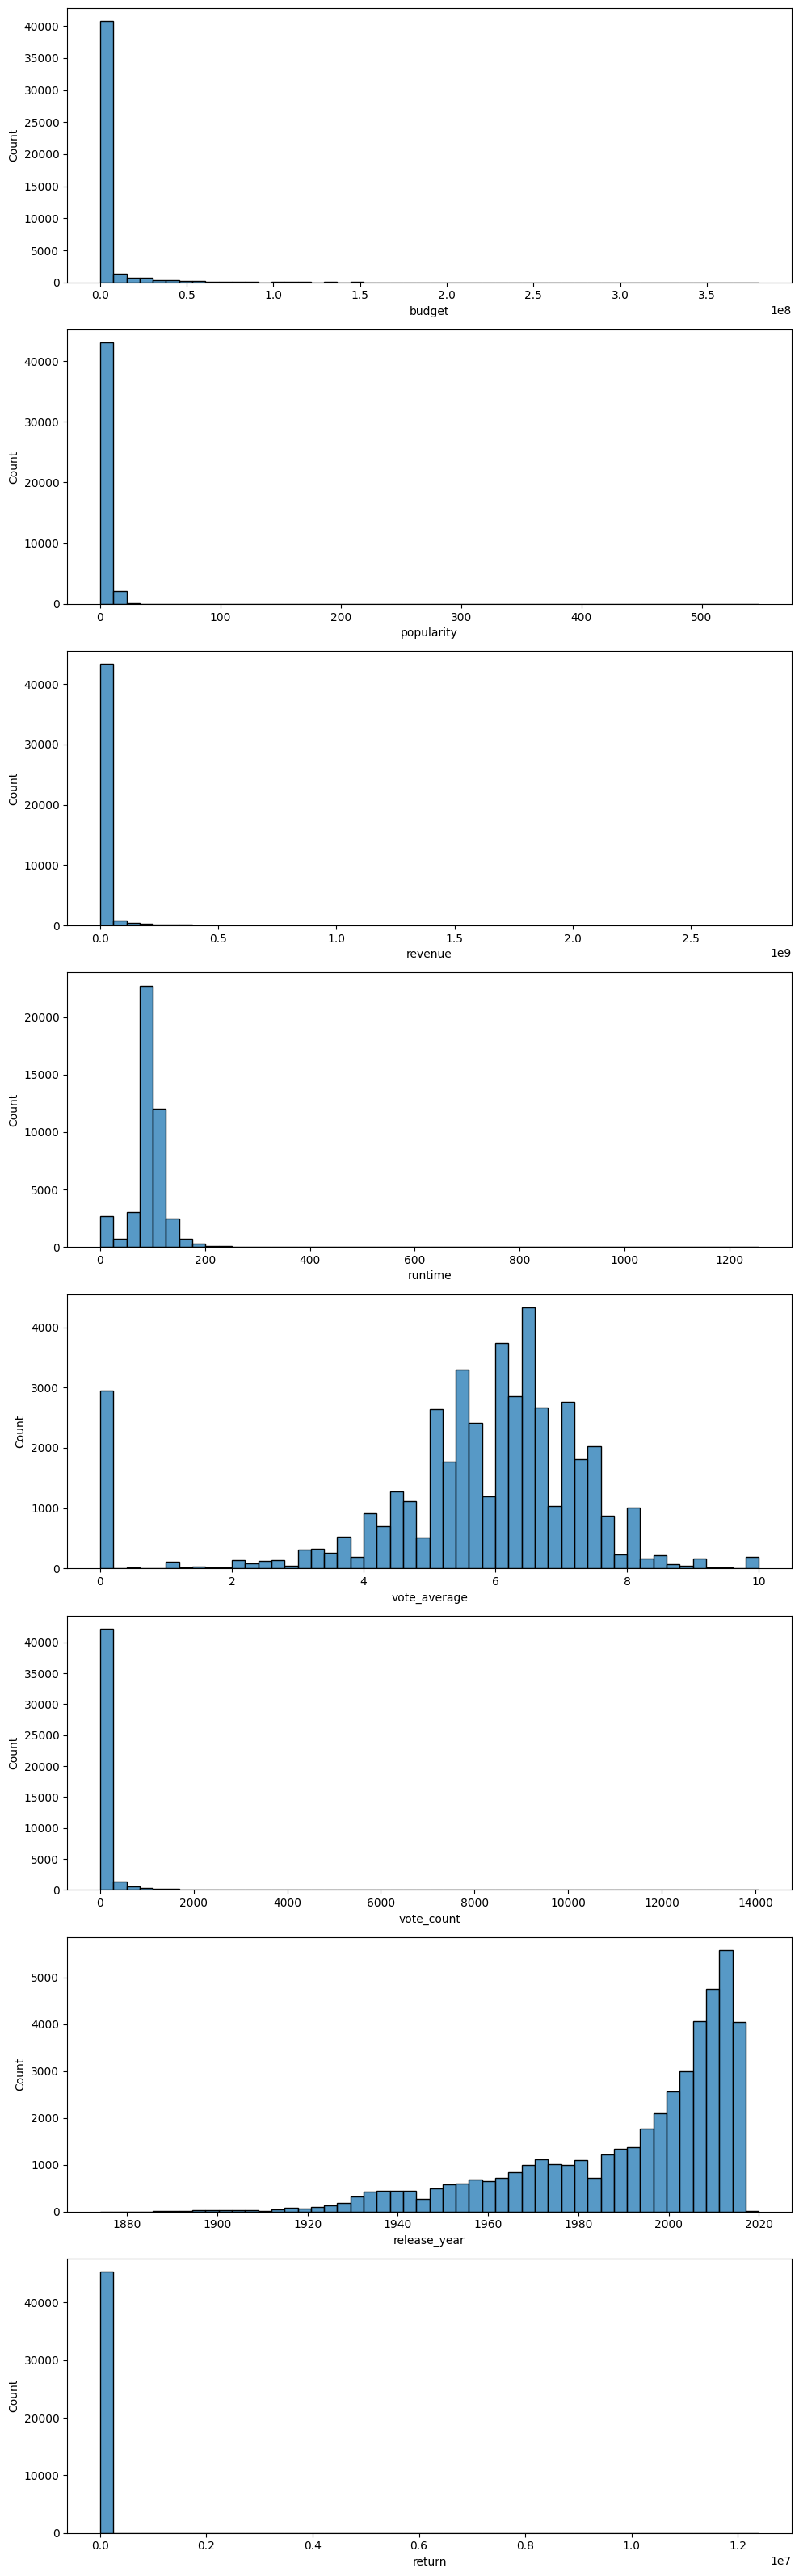

In [40]:
hist = graficar_histogramas(df_numeric,df_numeric.columns)

In [36]:
df['genres'].isna().sum()

0